### Libraries

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



In [3]:
# Load training and test sets
train_df = pd.read_csv("../data/UNSW_NB15_training-set.csv")
test_df = pd.read_csv("../data/UNSW_NB15_testing-set.csv")

# Preview data
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
# Check for missing values
print(train_df.isnull().sum())

# Data types
print(train_df.dtypes)

# Shape
print(f"Training shape: {train_df.shape}")
print(f"Testing shape: {test_df.shape}")

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [5]:
# Drop ID and IP-like columns 
cols_to_drop = ['id']
train_df.drop(columns=cols_to_drop, inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns to encode
cat_cols = ['proto', 'service', 'state']

# Encode each categorical column
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    

In [7]:
# Features and target
X = train_df.drop(columns=['label', 'attack_cat'])  # we'll use attack_cat later for multiclass
y = train_df['label']


In [8]:
from sklearn.model_selection import train_test_split

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred = rf.predict(X_val_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred))


Confusion Matrix:
 [[7266  134]
 [ 237 8830]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      7400
           1       0.99      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467

ROC AUC Score: 0.9778765734964036


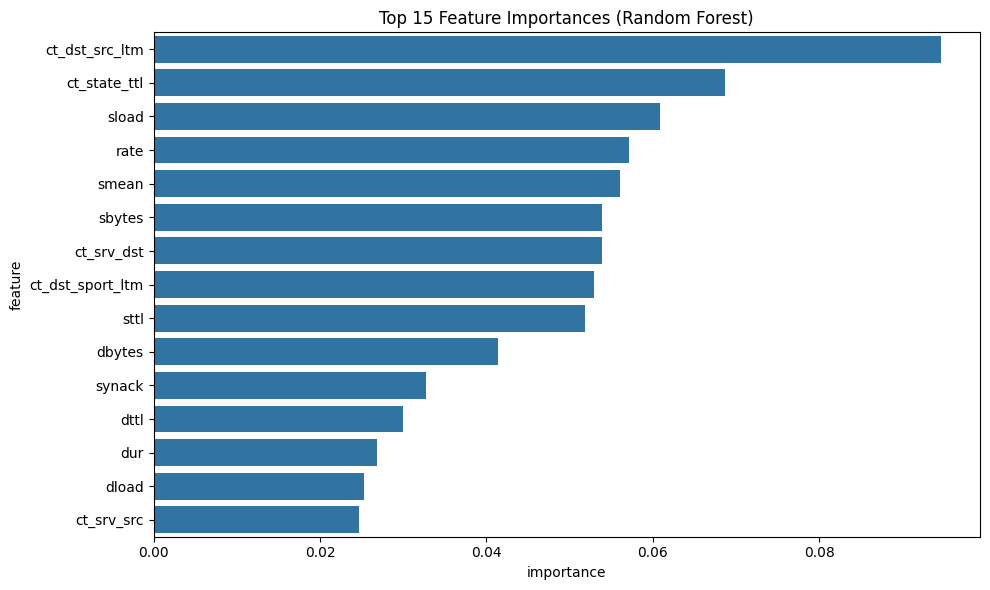

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and sort them
importances = rf.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='importance', ascending=False)

# Plot top 15
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp_df[:15], x='importance', y='feature')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.savefig('../results/feature_importance_rf.png', bbox_inches='tight')
plt.tight_layout()
plt.show()


In [12]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svm = svm_clf.predict(X_val_scaled)

print("SVM - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_svm))
print("\nSVM - Classification Report:\n", classification_report(y_val, y_pred_svm))
print("SVM - ROC AUC Score:", roc_auc_score(y_val, y_pred_svm))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


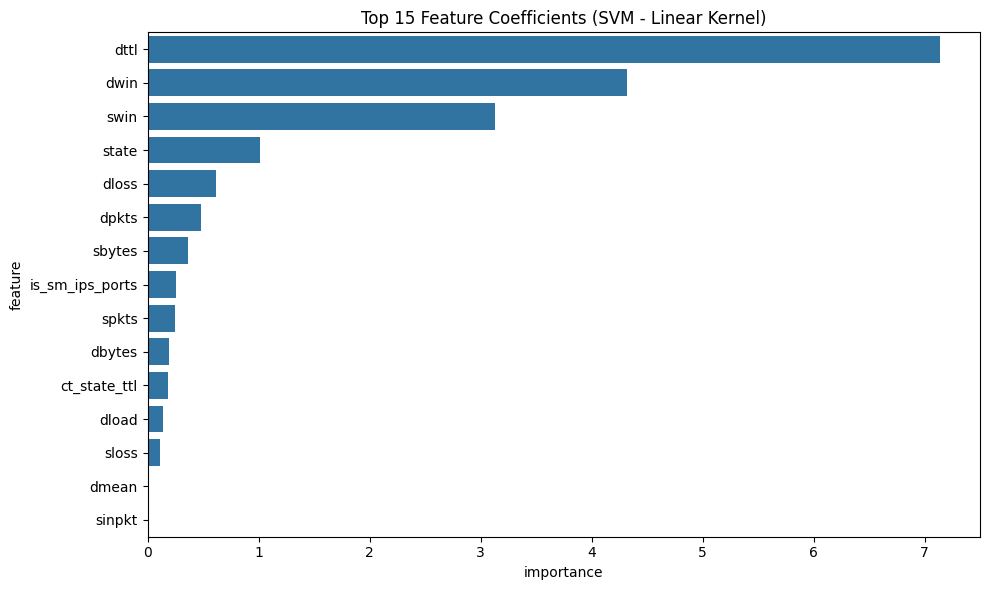

In [13]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

coeff = svm_linear.coef_[0]
feature_importance_svm = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(coeff)
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_svm[:15], x='importance', y='feature')
plt.title("Top 15 Feature Coefficients (SVM - Linear Kernel)")
plt.tight_layout()
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_val_scaled)

print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_val, y_pred_logreg))
print("\nLogistic Regression - Classification Report:\n", classification_report(y_val, y_pred_logreg))
print("Logistic Regression - ROC AUC Score:", roc_auc_score(y_val, y_pred_logreg))


Logistic Regression - Confusion Matrix:
 [[6511  889]
 [ 745 8322]]

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      7400
           1       0.90      0.92      0.91      9067

    accuracy                           0.90     16467
   macro avg       0.90      0.90      0.90     16467
weighted avg       0.90      0.90      0.90     16467

Logistic Regression - ROC AUC Score: 0.8988493840150947


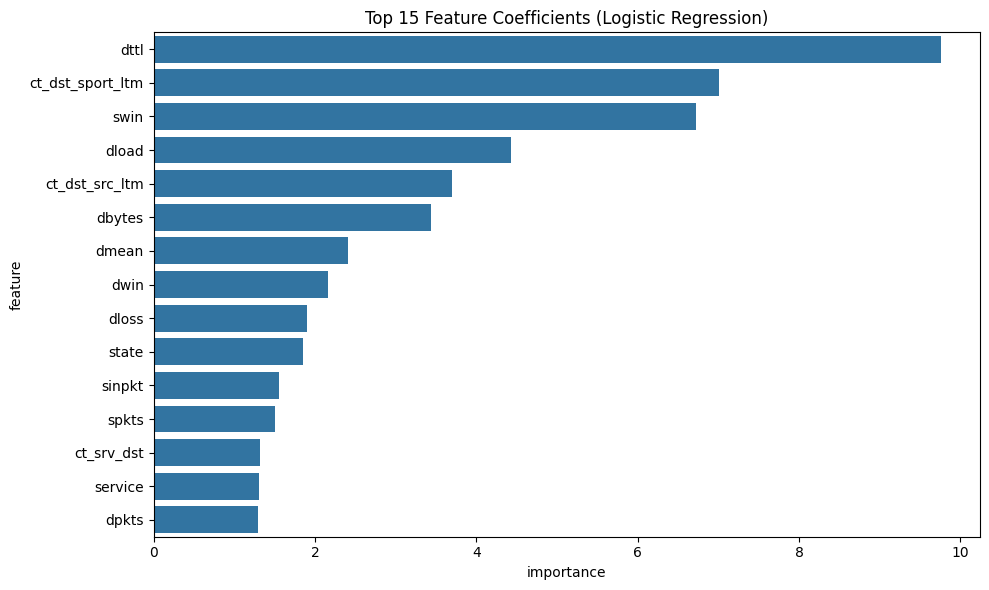

In [14]:
import numpy as np

coeff = logreg.coef_[0]
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(coeff)
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance_lr[:15], x='importance', y='feature')
plt.title("Top 15 Feature Coefficients (Logistic Regression)")
plt.savefig('../results/feature_importance_lr.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

y_pred_sgd = sgd_clf.predict(X_val_scaled)

print("SGD - Classification Report:\n", classification_report(y_val, y_pred_sgd))
print("SGD - ROC AUC Score:", roc_auc_score(y_val, y_pred_sgd))

SGD - Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      7400
           1       0.87      0.94      0.90      9067

    accuracy                           0.89     16467
   macro avg       0.89      0.88      0.89     16467
weighted avg       0.89      0.89      0.89     16467

SGD - ROC AUC Score: 0.8821499259268092


In [16]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_val_scaled)

print("GaussianNB - Classification Report:\n", classification_report(y_val, y_pred_gnb))
print("GaussianNB - ROC AUC Score:", roc_auc_score(y_val, y_pred_gnb))

GaussianNB - Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76      7400
           1       0.84      0.72      0.77      9067

    accuracy                           0.77     16467
   macro avg       0.77      0.77      0.77     16467
weighted avg       0.78      0.77      0.77     16467

GaussianNB - ROC AUC Score: 0.7749082878511024


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_val_scaled)

print("KNN - Classification Report:\n", classification_report(y_val, y_pred_knn))
print("KNN - ROC AUC Score:", roc_auc_score(y_val, y_pred_knn))

KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      7400
           1       0.96      0.91      0.94      9067

    accuracy                           0.93     16467
   macro avg       0.93      0.93      0.93     16467
weighted avg       0.93      0.93      0.93     16467

KNN - ROC AUC Score: 0.93256074150692


In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(X_train_scaled)

# Count how many were marked as noise
num_noise = np.sum(db_labels == -1)
print(f"Number of noise points detected: {num_noise}")

Number of noise points detected: 1731


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Random Forest": y_pred,
    # "SVM": y_pred_svm,
    "Logistic Regression": y_pred_logreg,
    "SGD": y_pred_sgd,
    "KNN": y_pred_knn,
    "Gaussian NB": y_pred_gnb
}

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "ROC AUC": []
}

for model_name, preds in models.items():
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_val, preds))
    metrics["Precision"].append(precision_score(y_val, preds))
    metrics["Recall"].append(recall_score(y_val, preds))
    metrics["F1 Score"].append(f1_score(y_val, preds))
    metrics["ROC AUC"].append(roc_auc_score(y_val, preds))

import pandas as pd
results_df = pd.DataFrame(metrics)
results_df.to_csv('../results/model_performance_summary.csv', index=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Random Forest,0.977470,0.985051,0.973861,0.979424,0.977877
1,Logistic Regression,0.900771,0.903485,0.917834,0.910603,0.898849
2,SGD,0.887593,0.869824,0.935921,0.901663,0.882150
3,KNN,0.930467,0.959833,0.911878,0.935241,0.932561
4,Gaussian NB,0.769235,0.838975,0.718871,0.774293,0.774908


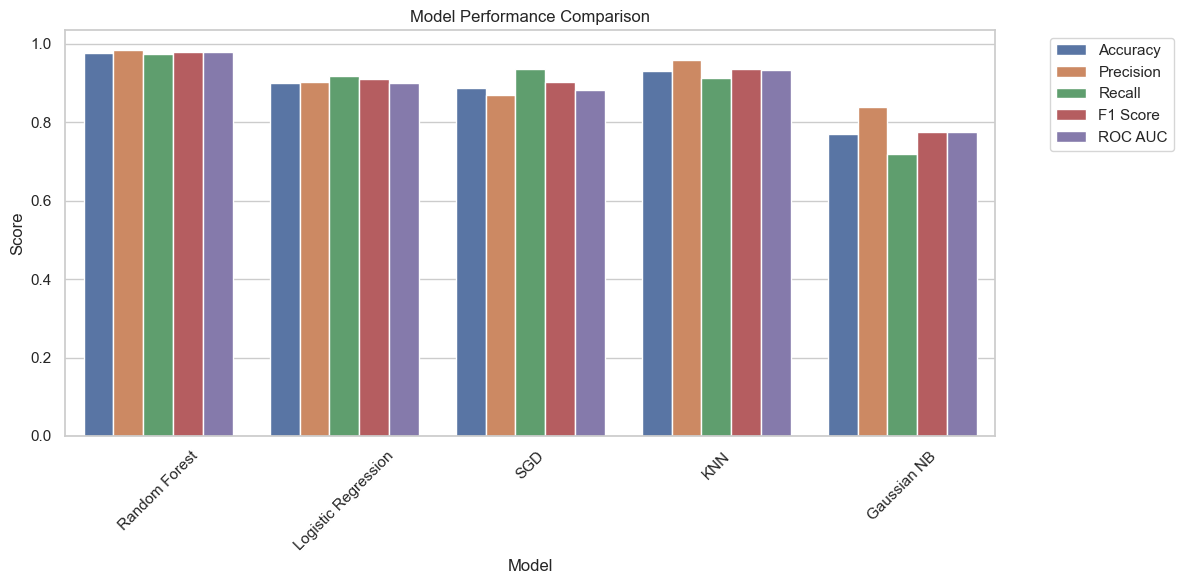

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Melt for seaborn
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('../results/comparison_matrix.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.savefig('../results/confusion_matrix.png', bbox_inches='tight')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

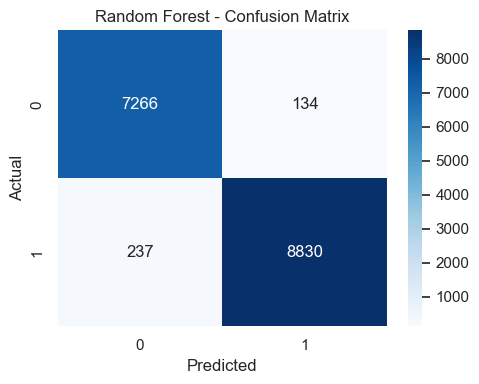

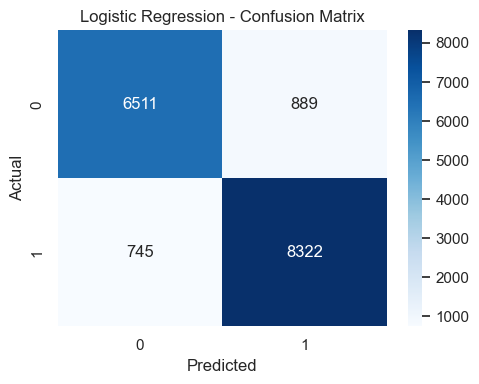

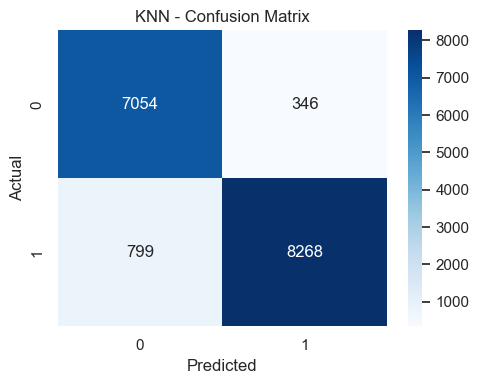

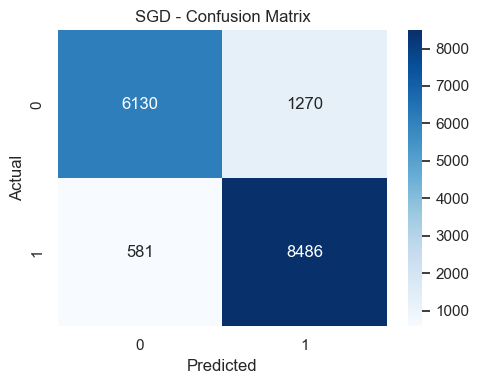

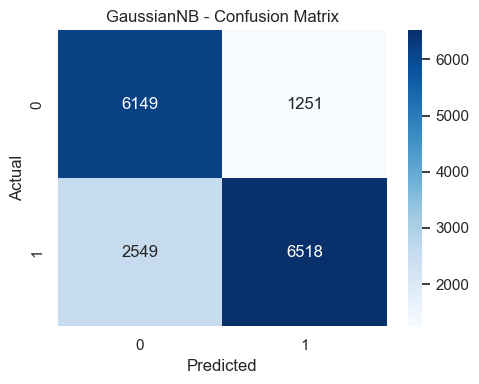

In [23]:
plot_conf_matrix("Random Forest", y_val, y_pred)
# plot_conf_matrix("SVM", y_val, y_pred_svm)
plot_conf_matrix("Logistic Regression", y_val, y_pred_logreg)
plot_conf_matrix("KNN", y_val, y_pred_knn)
plot_conf_matrix("SGD", y_val, y_pred_sgd)
plot_conf_matrix("GaussianNB", y_val, y_pred_gnb)

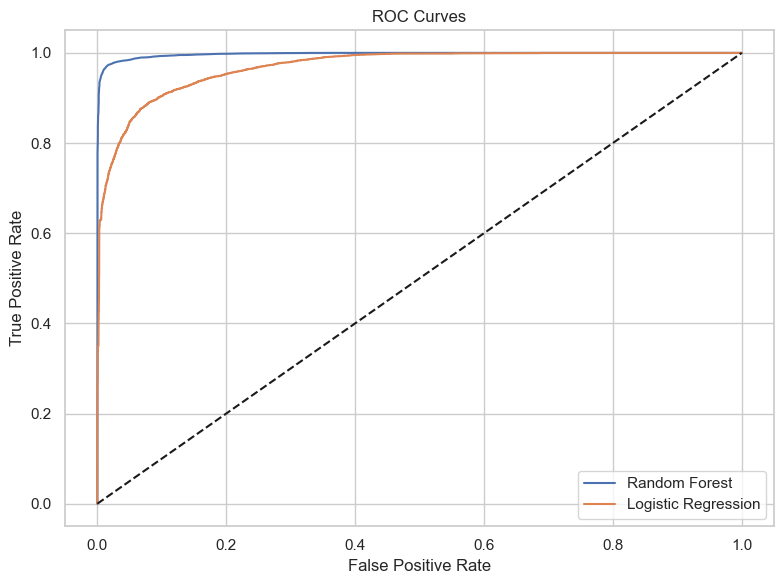

In [25]:
from sklearn.metrics import roc_curve

def plot_roc_curve(model, X_val, y_val, label):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_val)[:, 1]
    else:
        y_score = model.decision_function(X_val)
    fpr, tpr, _ = roc_curve(y_val, y_score)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(8, 6))
plot_roc_curve(rf, X_val_scaled, y_val, "Random Forest")
# plot_roc_curve(svm_clf, X_val_scaled, y_val, "SVM")
plot_roc_curve(logreg, X_val_scaled, y_val, "Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('../results/roc_curve.png', bbox_inches='tight')
plt.legend()
plt.tight_layout()
plt.show()